# Image Classification With Histogram Of Oriented Gradients Features(HoG)

This histogram of gradients is a gradient based feature extraction method performed on images, aiding in image classification. It computes the features by dividing an image in smaller parts/cells, and counts the occurrences of gradient orientation.

In [1]:
import numpy as np #import numpy for mathematiical operations and image representation
import tensorflow as tf #import tensorflow library for image operations and classification
from tensorflow import keras #import keras to build neural network
import os #imort os to access directories from the operating system
import cv2 

## Loading the dataset

In [5]:
#since we are trying to extract hog features, we will resive the images as 64 by 128 and loading in the data as a greyscale
#Data Loader
def dataLoader(Dataset_path):
    images = []
    labels = []
    label_map ={}

    if not os.path.exists(Dataset_path):
        raise FileNotFoundError (f"The file path {Dataset_path} does not exist.")
   #for every folder in my 'data' directory, loop thriugh abd return the iage as tensor and record the class labels
    for label, folder in enumerate(sorted(os.listdir(Dataset_path))):
        folder_path = os.path.join(Dataset_path, folder)
        label_map[label] = folder

        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (64,128))

            images.append(image)
            labels.append(label)
    return images, labels, label_map

In [6]:
images, labels, label_map = dataLoader('data')

In [7]:
label_map[0] = "Exclamation (!)"
label_map[1] = "Left Parantheses"
label_map[2] = "Right Parenthese"
label_map[3] = "Zero"
label_map[4] = "Seven"
label_map[5] = "Nine"
label_map[6]= "Not Equal"

##  Visualising the dataset

In [8]:
import matplotlib.pyplot as plt



def visualise_few_images_per_class(img_array, labels, label_map, num_images_visualised_per_class=1,):
    #Set the size of the visualisation
    plt.figure(figsize=(10,10))
    labels = np.atleast_1d(labels)
    #get random indexes for the images in the image array based on their class value
    for classLabel, class_name in label_map.items():
        class_indices = np.where(labels == classLabel)[0]
        selected_indices = np.random.choice(class_indices,num_images_visualised_per_class,replace=False)

        for i, idx in enumerate(selected_indices):
            plt.subplot(len(label_map), num_images_visualised_per_class, classLabel * num_images_visualised_per_class + i + 1)
            plt.imshow(img_array[idx], cmap='gray')
            plt.title(class_name)
            plt.axis('off')
    
    plt.tight_layout()
    plt.show(),

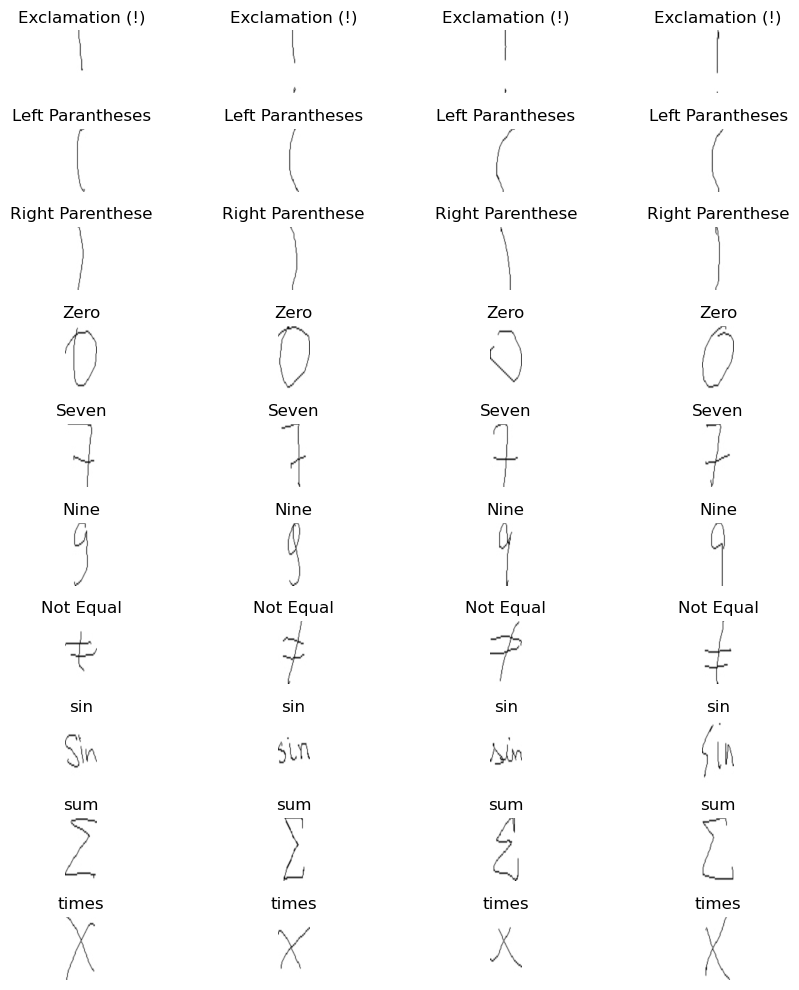

In [9]:
visualise_few_images_per_class(images, labels, label_map=label_map, num_images_visualised_per_class=4)

## Data Partioning

In [13]:
from sklearn.model_selection import train_test_split
import numpy as np

X = np.array(images)
y= np.array(labels)
train_size=0.8
random_seed =42

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=random_seed, train_size=train_size)

In [16]:
print("The shape of the training set is ", X_train.shape)
print("The shape of the testing set is  ", X_test.shape)


The shape of the training set is  (4000, 128, 64)
The shape of the testing set is   (1000, 128, 64)


## Feauture Extraction using HOG

Here we extract the histogram of gradient features from the input image.

In [22]:
from skimage.feature import hog

def extract_hog_features(images):
    hog_features = []
    for image in images:
        features = hog(image, orientations=9, pixels_per_cell=(8,8),cells_per_block=(2,2))
        hog_features.append(features)
    return hog_features




In [32]:
X_train_features_extracted = np.array(extract_hog_features(X_train))
X_test_features_extracted = np.array(extract_hog_features(X_test))


In [33]:
X_train_features_extracted

array([[0.3110619 , 0.10502016, 0.23247202, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [34]:
#print out the shape of X_test and X_train
print("The shape of the X_train features is", X_train_features_extracted.shape)
print("The shape of the X_test features is ", X_test_features_extracted.shape)

The shape of the X_train features is (4000, 3780)
The shape of the X_test features is  (1000, 3780)


## Support Vector Machine

Here we initalise a support a vector machine from sklearn. The kernel is set to the Radial Basis Function('rbf') and the C set to 10.
The model is then trained on the HOG extracted features from the traning set.

In [36]:
from sklearn import svm

SVM_model = svm.SVC(kernel='rbf', C=10)
SVM_model.fit(X_train_features_extracted, y_train)


SVC(C=10)

From the SVM model we have trained above, we will make predictions on the test set(unseen data)

In [38]:
y_predictions = SVM_model.predict(X_test_features_extracted)

What does the predictions look like so far.

In [41]:
y_predictions

array([3, 5, 5, 2, 1, 0, 1, 4, 4, 3, 4, 0, 1, 1, 6, 7, 2, 6, 3, 2, 1, 6,
       2, 1, 9, 1, 8, 0, 9, 0, 3, 0, 9, 9, 3, 5, 7, 8, 9, 4, 7, 8, 0, 0,
       1, 7, 7, 9, 6, 5, 9, 9, 4, 5, 2, 6, 2, 0, 3, 5, 4, 8, 8, 7, 0, 5,
       6, 4, 7, 9, 3, 0, 0, 0, 2, 4, 1, 5, 5, 7, 6, 6, 8, 3, 6, 2, 1, 1,
       9, 7, 8, 0, 0, 2, 0, 9, 5, 6, 0, 0, 3, 3, 4, 8, 0, 0, 1, 2, 9, 2,
       2, 2, 8, 1, 4, 7, 4, 4, 0, 4, 2, 2, 9, 0, 4, 9, 4, 9, 5, 6, 8, 6,
       3, 2, 7, 8, 8, 7, 1, 0, 7, 7, 9, 7, 8, 6, 5, 7, 5, 5, 2, 7, 9, 9,
       3, 0, 5, 5, 7, 0, 4, 6, 1, 2, 0, 7, 2, 3, 6, 4, 6, 3, 5, 6, 0, 6,
       8, 6, 0, 3, 9, 5, 3, 0, 5, 7, 7, 7, 1, 3, 1, 7, 7, 9, 4, 2, 1, 5,
       7, 8, 7, 1, 5, 8, 6, 4, 4, 6, 7, 1, 6, 1, 7, 4, 8, 4, 9, 0, 7, 2,
       3, 1, 9, 6, 3, 6, 5, 5, 0, 4, 1, 7, 2, 9, 0, 6, 6, 1, 5, 9, 1, 1,
       8, 8, 2, 3, 4, 2, 3, 9, 9, 8, 3, 2, 4, 1, 7, 4, 0, 1, 3, 4, 4, 8,
       2, 3, 4, 5, 5, 0, 1, 2, 9, 0, 8, 6, 2, 5, 7, 2, 9, 9, 1, 2, 3, 7,
       2, 6, 3, 1, 0, 5, 4, 4, 6, 1, 4, 4, 8, 2, 0,

### Model Evaluation

Here we evaluate the Accuracy, precsion, recall and F1 score of the model.

These metrics are used to evaluate the performace of the SVM recition modle on unseen data.

In [43]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

Accuracy = accuracy_score(y_test, y_predictions)
Classification_Report = classification_report(y_test, y_predictions)
Confusion_Matrix = confusion_matrix(y_test, y_predictions)

print("ACCURACY: ", Accuracy)
print("CLASSIFICATION REPORT: ", Classification_Report)


ACCURACY:  0.995
CLASSIFICATION REPORT:                precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00       105
           2       1.00      1.00      1.00       105
           3       1.00      0.99      0.99        85
           4       0.98      0.98      0.98        94
           5       1.00      0.98      0.99        98
           6       0.98      1.00      0.99        98
           7       1.00      1.00      1.00       112
           8       0.99      1.00      0.99        81
           9       1.00      1.00      1.00       111

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       1.00      0.99      0.99      1000



## Artificial Neural Netwrok(ANN)